In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset using pandas
df = pd.read_csv('Iris.csv')

In [4]:
#Header of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#tail of dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
df.shape

(150, 6)

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
species = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2}

In [12]:
df['Species'] = df['Species'].map(species)

In [13]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [14]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

In [15]:
X.shape, y.shape

((150, 4), (150,))

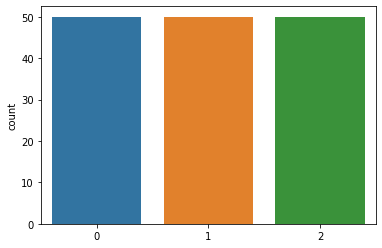

In [16]:
#check data is balanced ya not balanced
sns.countplot(y)
plt.show()

In [17]:
#import machine learning model - Decision Tree
#import split data librar - sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
#divide data into testing and traning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
#fit data in model
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [20]:
#after fiting check prediction 
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [21]:
#import library for matrics
#import tree library for visualizing the decision tree
from sklearn import metrics
from sklearn import tree

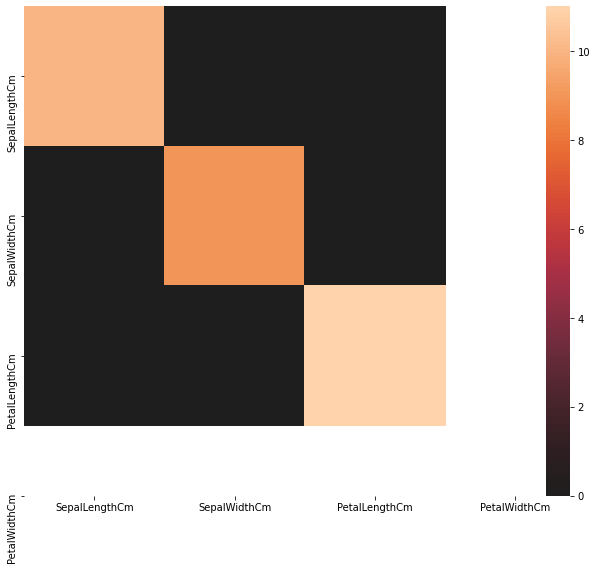

In [22]:
#heatmap
plt.figure(figsize = (11,9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = df.iloc[:, 1:5].columns.values,  yticklabels = df.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [23]:
#check precision, recall, F1 score
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


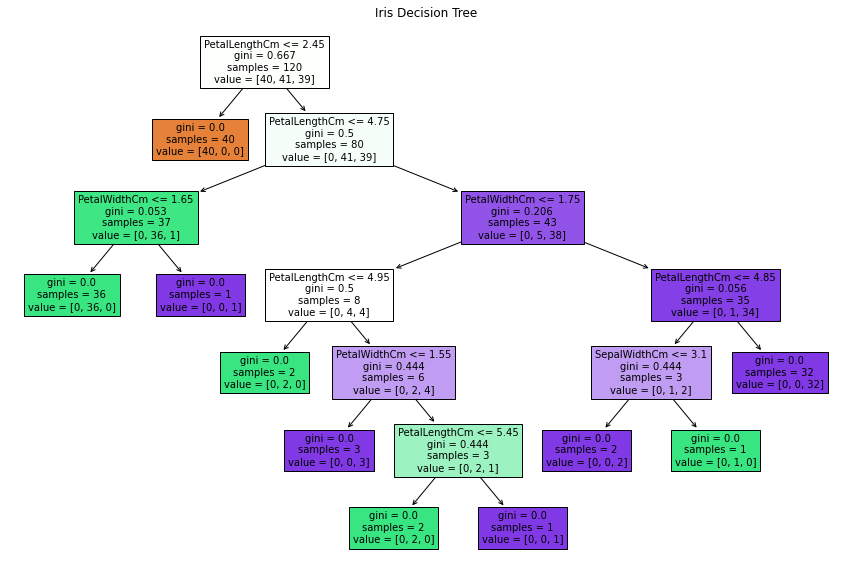

In [24]:
#visualizing decision tree using sklearn - tree library
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names = df.iloc[:, 1:5].columns.values,filled = True);
plt.title("Iris Decision Tree")
plt.show()